In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tf_funcs import get_cifar10_data, get_mnist_loaders, classifier_overlay, combine_model, FullyConnectedNet
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

2023-05-27 21:07:28.795632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 21:07:43.837223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-27 21:07:43.921109: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-

In [2]:
# config
batch_size = 32
test_batch_size = 64
epochs = 2
lr = 1e-2
momentum = 0.0
inputs = tf.keras.layers.Input(shape=(32,32,3))
optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

2023-05-27 21:07:44.185722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-27 21:07:44.186028: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-27 21:07:44.186182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

`from_logits=False` in case of softmax activation, `True` in any other case,
logits being what comes out of output neurons after feed forward before applying last activation.  
  
No need to check whether CUDA is used as it is prioritized by default in TensorFlow. Device
used for computation printed out at model compilation.  
  
Add `model.summary()` to see architecture and number of params.

In [3]:
def whole_thing(predef_model, preprocess, batch_size, test_batch_size, image_size=32):
	x_train, y_train, x_test, y_test = get_cifar10_data(preprocess)

	model = combine_model(inputs, predef_model, classifier_overlay, image_size=image_size)
	model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

	train_history = model.fit(
		x_train, y_train,
		batch_size=batch_size,
		validation_data=(x_test, y_test),
		validation_batch_size=test_batch_size,
		epochs=epochs,
		shuffle=True
	)

	fig, (ax_train, ax_test) = plt.subplots(1, 2)
	fig.set_size_inches(12.8, 4.8)

	ax_train.plot(train_history.history['loss'])
	ax_test.plot(train_history.history['val_accuracy'])
	ax_train.set_title('Training history')
	ax_test.set_title('Accuracy history')

	plt.show(fig)

	del x_train, y_train, x_test, y_test, model, train_history

ResNet50 - 2015


2023-05-24 22:33:27.567344: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-24 22:33:28.109771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2


2023-05-24 22:33:36.056155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-24 22:33:37.383229: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:33:37.481804: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fab2a451cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 22:33:37.481827: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-05-24 22:33:37.536988: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-05-24 22:33:37.932500: W tensorflow/tsl/framework/bf

1563/1563 [==============================] - 140s 79ms/step - loss: 1.8239 - accuracy: 0.3327 - val_loss: 1.5915 - val_accuracy: 0.4263
Epoch 2/2
1563/1563 [==============================] - 120s 77ms/step - loss: 1.5052 - accuracy: 0.4543 - val_loss: 1.4696 - val_accuracy: 0.4851


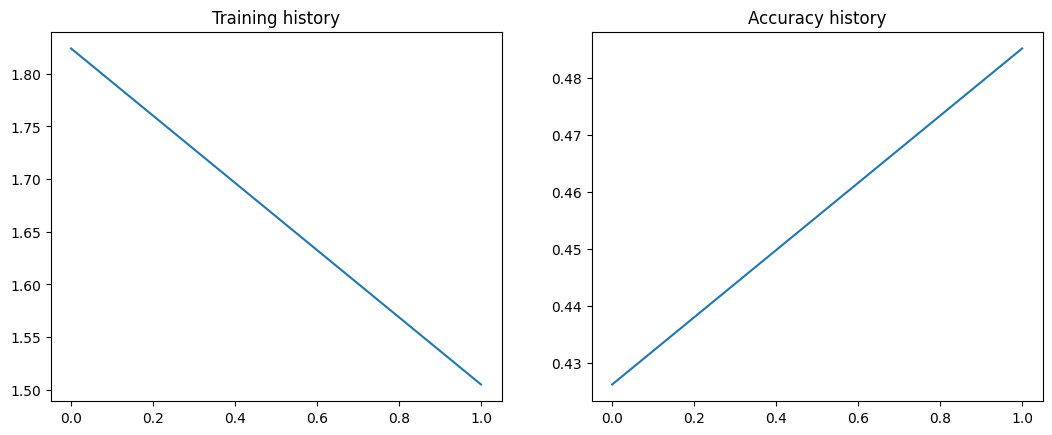

In [4]:
print('ResNet50 - 2015')

whole_thing(
	tf.keras.applications.ResNet50,
  tf.keras.applications.resnet50.preprocess_input,
  batch_size,
  test_batch_size
)

Inception v3 - 2016


2023-05-27 21:08:02.322464: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-27 21:08:02.952537: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2


2023-05-27 21:08:19.556887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-27 21:08:21.810776: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 845.12MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-27 21:08:22.656316: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 736.91MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-27 21:08:22.901746: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fb4ebf4ce30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-27 21:08:22.901774: I tensorflow/compiler/xla/service/service.cc:177]  

25000/25000 [==============================] - ETA: 0s - loss: 1.9902 - accuracy: 0.2576

2023-05-27 21:54:05.901156: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 288.19MiB (302186496 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-27 21:54:05.901417: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 259.37MiB (271968000 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-27 21:54:05.901665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 233.43MiB (244771328 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-27 21:54:06.212132: W tensorflow/tsl/framework/bfc_allocator.cc:366] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batc

25000/25000 [==============================] - 2876s 114ms/step - loss: 1.9902 - accuracy: 0.2576 - val_loss: 2.7272 - val_accuracy: 0.3666
Epoch 2/2
25000/25000 [==============================] - 2851s 114ms/step - loss: 1.5720 - accuracy: 0.4392 - val_loss: 2.8558 - val_accuracy: 0.4890


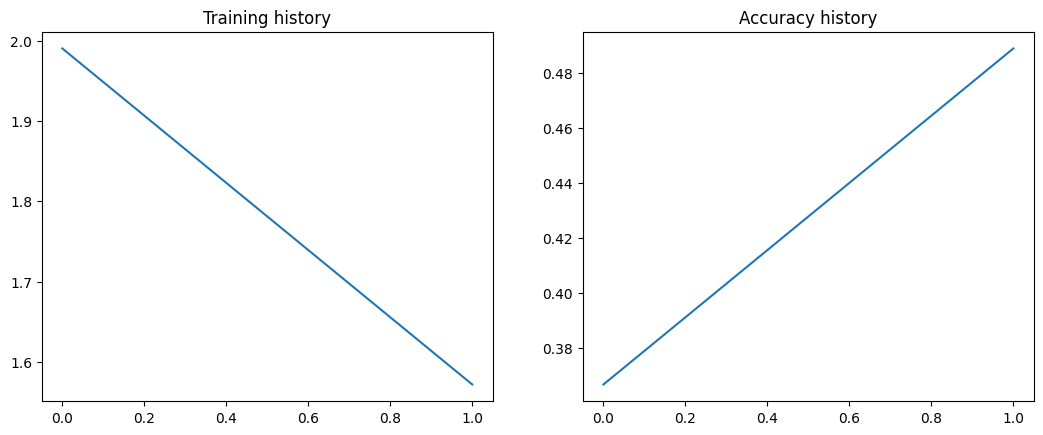

In [4]:
print('Inception v3 - 2016')

inception_batch_size = 2
inception_test_batch_size = 4

whole_thing(
	tf.keras.applications.InceptionV3,
	tf.keras.applications.inception_v3.preprocess_input,
  inception_batch_size,
  inception_test_batch_size,
  image_size=299
)

Densenet121 - 2018


2023-05-24 22:43:10.315456: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-24 22:43:10.843704: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2


2023-05-24 22:43:25.996179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-24 22:43:28.986225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 480.19MiB (503513088 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-24 22:43:28.986504: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 432.17MiB (453161984 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-24 22:43:29.724550: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f0ee8ac3c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 22:43:29.724575: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-05-24 22:43:30.090061: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for

1562/1563 [============================>.] - ETA: 0s - loss: 1.6917 - accuracy: 0.3737

2023-05-24 22:45:12.771275: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:45:12.804280: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1563/1563 [==============================] - ETA: 0s - loss: 1.6918 - accuracy: 0.3736

2023-05-24 22:45:19.340269: W tensorflow/tsl/framework/bfc_allocator.cc:366] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2023-05-24 22:45:19.356931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:736] failed to allocate 480.19MiB (503513088 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-05-24 22:45:19.356975: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 394.44MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performan

1563/1563 [==============================] - 132s 63ms/step - loss: 1.6918 - accuracy: 0.3736 - val_loss: 1.5858 - val_accuracy: 0.4240
Epoch 2/2
1563/1563 [==============================] - 88s 56ms/step - loss: 1.3695 - accuracy: 0.5004 - val_loss: 1.3024 - val_accuracy: 0.5242


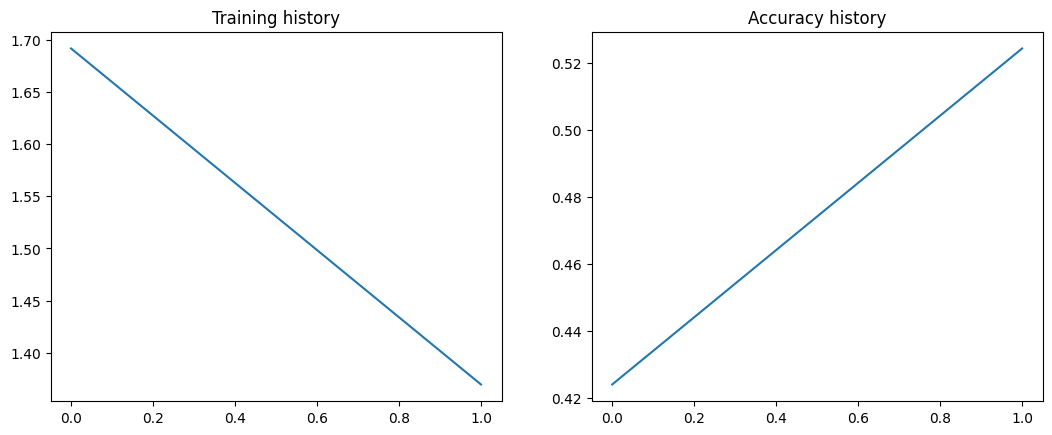

In [4]:
print('Densenet121 - 2018')

whole_thing(
	tf.keras.applications.DenseNet121,
  tf.keras.applications.densenet.preprocess_input,
  batch_size,
  test_batch_size
)

MobileNet v2 - 2019


2023-05-24 22:53:36.646372: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-24 22:53:37.187761: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2


2023-05-24 22:53:43.413352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-24 22:53:44.699220: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f89c93b3ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 22:53:44.699261: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-05-24 22:53:44.758998: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-05-24 22:53:45.114143: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1007.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:53:45.231018: W tensorflow/tsl/framework

1561/1563 [============================>.] - ETA: 0s - loss: 1.8596 - accuracy: 0.3049

2023-05-24 22:55:05.285443: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 962.56MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:55:05.315492: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 916.08MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:55:05.337966: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 703.42MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:55:05.366371: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocato

1563/1563 [==============================] - 93s 50ms/step - loss: 1.8596 - accuracy: 0.3050 - val_loss: 2.3173 - val_accuracy: 0.1000
Epoch 2/2
1563/1563 [==============================] - 76s 49ms/step - loss: 1.5431 - accuracy: 0.4334 - val_loss: 2.3544 - val_accuracy: 0.1000


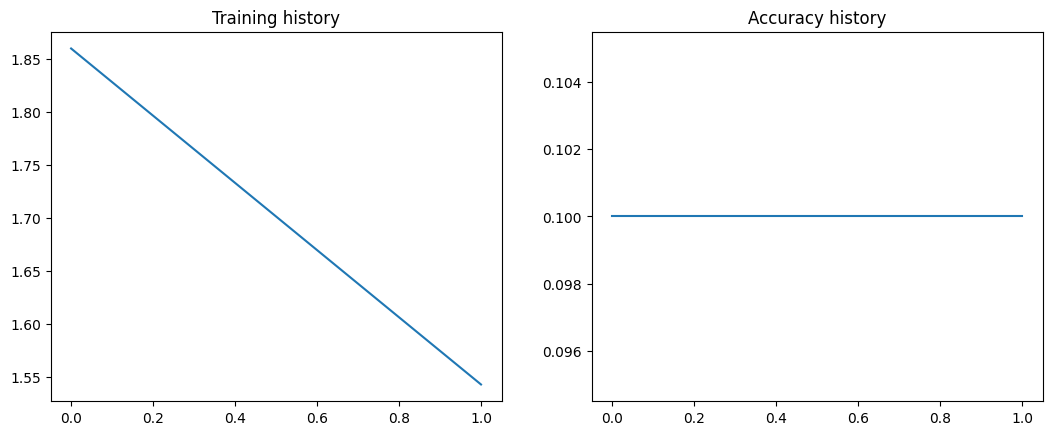

In [4]:
print('MobileNet v2 - 2019')

whole_thing(
	tf.keras.applications.MobileNetV2,
  tf.keras.applications.mobilenet_v2.preprocess_input,
  batch_size,
  test_batch_size
)

ConvNeXt Tiny - 2020


2023-05-24 22:57:16.928921: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-05-24 22:57:17.453603: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/2


2023-05-24 22:57:29.379320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-24 22:57:29.899031: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7faecfaf4a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 22:57:29.899060: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2023-05-24 22:57:30.472129: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-05-24 22:57:33.272022: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.61GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:57:33.272075: W tensorflow/tsl/framework/bf

1562/1563 [============================>.] - ETA: 0s - loss: 1.5524 - accuracy: 0.4445

2023-05-24 22:59:25.791978: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:59:25.792032: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:59:26.880909: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 680.03MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-05-24 22:59:26.880954: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (G

1563/1563 [==============================] - 141s 77ms/step - loss: 1.5525 - accuracy: 0.4445 - val_loss: 1.3999 - val_accuracy: 0.5001
Epoch 2/2
1563/1563 [==============================] - 113s 72ms/step - loss: 1.2691 - accuracy: 0.5511 - val_loss: 1.3180 - val_accuracy: 0.5341


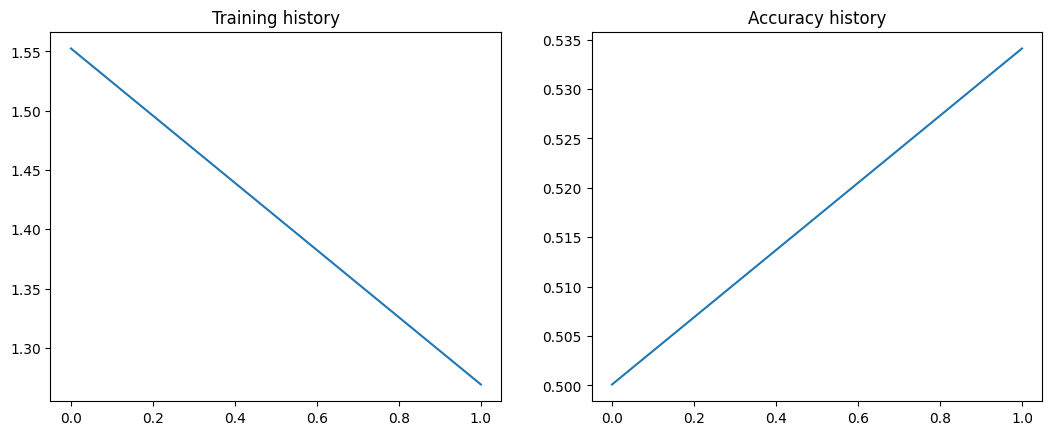

In [4]:
print('ConvNeXt Tiny - 2020')

whole_thing(
	tf.keras.applications.ConvNeXtTiny,
  tf.keras.applications.convnext.preprocess_input,
  batch_size,
  test_batch_size
)

Fully connected MLP - Simard et al. 2003
Epoch 1/5


2023-05-24 23:02:13.189060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [60000,784]
	 [[{{node Placeholder/_0}}]]
2023-05-24 23:02:13.189366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [60000]
	 [[{{node Placeholder/_1}}]]
2023-05-24 23:02:13.807282: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fd9d71f4610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-24 23:02:13.807307: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA 

  1/469 [..............................] - ETA: 7:32 - loss: 3.1697 - accuracy: 0.1016

2023-05-24 23:02:14.017605: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 2s 3ms/step - loss: 0.9830 - accuracy: 0.7662 - val_loss: 0.5585 - val_accuracy: 0.8621
Epoch 2/5
  1/469 [..............................] - ETA: 1s - loss: 0.5719 - accuracy: 0.8672

2023-05-24 23:02:15.312813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [10000]
	 [[{{node Placeholder/_1}}]]


469/469 [==============================] - 1s 2ms/step - loss: 0.5034 - accuracy: 0.8683 - val_loss: 0.4347 - val_accuracy: 0.8783
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8844 - val_loss: 0.3765 - val_accuracy: 0.8957
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3824 - accuracy: 0.8922 - val_loss: 0.3495 - val_accuracy: 0.9019
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8985 - val_loss: 0.3353 - val_accuracy: 0.9070


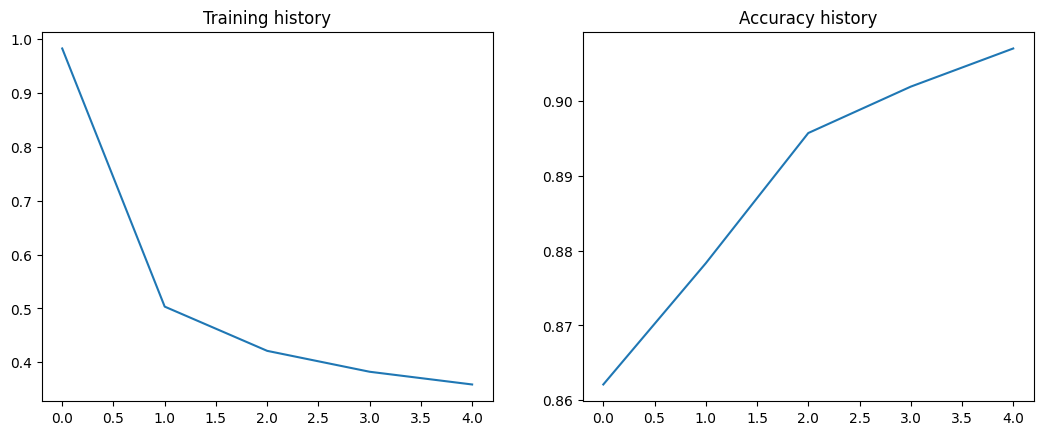

In [4]:
print('Fully connected MLP - Simard et al. 2003')

# config
batch_size = 128
test_batch_size = 512
epochs = 5

train_ds, test_ds = get_mnist_loaders(batch_size, test_batch_size)
model = FullyConnectedNet()
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

train_history = model.fit(
	train_ds,
	validation_data=test_ds,
	validation_batch_size=test_batch_size,
	epochs=epochs
)

fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history.history['loss'])
ax_test.plot(train_history.history['val_accuracy'])
ax_train.set_title('Training history')
ax_test.set_title('Accuracy history')

plt.show(fig)

del train_ds, test_ds, model, train_history